### Import Library

In [121]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib


### Import Data

In [90]:
# Membaca file Excel yang diunggah oleh user
file_path = 'C:/Users/fezaa/My Drive/00. Drive PC/1.STIS/7. Semester 7/MAGANG/02. FORECAST KEMISKINAN/compile/compiled_data_normalized.xlsx'
data = pd.read_excel(file_path)
data

,Tahun,Persentase Kemiskinan,Biaya kuliah,Biaya listrik,Biaya rumah sakit,Medical check up,Paket Internet,Biaya sekolah,Harga bensin,Jual rumah
0,2010,13.11,89.555556,53.703704,57.142857,19.047619,98.1,60.3,43.9,85.714286
1,2011,11.51,69.000000,83.333333,78.571429,66.666667,86.0,0.0,0.0,0.000000
2,2012,10.75,89.555556,53.703704,57.142857,19.047619,98.1,60.3,43.9,85.714286
3,2013,10.58,89.555556,53.703704,57.142857,19.047619,98.1,60.3,43.9,85.714286
4,2014,9.87,89.555556,53.703704,57.142857,19.047619,98.1,60.3,43.9,85.714286
5,2015,10.09,89.555556,53.703704,57.142857,19.047619,98.1,60.3,43.9,85.714286
6,2016,10.10,100.000000,0.000000,0.000000,0.000000,100.0,53.0,47.0,100.000000
7,2017,9.90,100.000000,0.000000,85.714286,23.809524,95.0,38.0,62.0,100.000000
8,2018,7.94,85.000000,62.500000,0.000000,0.000000,100.0,58.0,42.0,100.000000
9,2019,7.94,89.000000,45.833333,78.571429,0.000000,100.0,69.0,100.0,100.000000


### Split

In [91]:
target = 'Persentase Kemiskinan'
exog_vars = data.columns[2:]  # Semua kolom setelah 'Persentase Kemiskinan'

# Membagi data menjadi training dan testing
train_data = data[data['Tahun'].between(2010, 2021)].drop(columns=['Tahun'])
test_data = data[data['Tahun'].between(2022, 2023)].drop(columns=['Tahun'])

In [92]:
train_data

,Persentase Kemiskinan,Biaya kuliah,Biaya listrik,Biaya rumah sakit,Medical check up,Paket Internet,Biaya sekolah,Harga bensin,Jual rumah
0,13.11,89.555556,53.703704,57.142857,19.047619,98.1,60.3,43.9,85.714286
1,11.51,69.000000,83.333333,78.571429,66.666667,86.0,0.0,0.0,0.000000
2,10.75,89.555556,53.703704,57.142857,19.047619,98.1,60.3,43.9,85.714286
3,10.58,89.555556,53.703704,57.142857,19.047619,98.1,60.3,43.9,85.714286
4,9.87,89.555556,53.703704,57.142857,19.047619,98.1,60.3,43.9,85.714286
5,10.09,89.555556,53.703704,57.142857,19.047619,98.1,60.3,43.9,85.714286
6,10.10,100.000000,0.000000,0.000000,0.000000,100.0,53.0,47.0,100.000000
7,9.90,100.000000,0.000000,85.714286,23.809524,95.0,38.0,62.0,100.000000
8,7.94,85.000000,62.500000,0.000000,0.000000,100.0,58.0,42.0,100.000000
9,7.94,89.000000,45.833333,78.571429,0.000000,100.0,69.0,100.0,100.000000


In [93]:
test_data

,Persentase Kemiskinan,Biaya kuliah,Biaya listrik,Biaya rumah sakit,Medical check up,Paket Internet,Biaya sekolah,Harga bensin,Jual rumah
12,7.9,100.0,91.666667,71.428571,0.0,100.0,55.0,45.0,100.0
13,7.3,100.0,0.000000,0.000000,0.0,100.0,60.0,40.0,100.0


### Modelling

In [94]:
# Membagi data menjadi fitur (X) dan target (y)
X_train = train_data[exog_vars]
y_train = train_data[target]
X_test = test_data[exog_vars]
y_test = test_data[target]


In [95]:
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective='reg:squarederror')
}

# Hyperparameter grid untuk tuning
param_grid = {
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}

In [96]:
# Langkah 1: Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Langkah 2: Melakukan PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [122]:
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

joblib.dump(pca, 'pca.pkl')

['pca.pkl']

In [97]:
# Langkah 3: Mengambil nilai eigenvalue
eigenvalues = pca.explained_variance_
eigenvalues

array([5.10122504e+00, 1.94883811e+00, 1.17399537e+00, 4.06763009e-01,
       4.79422773e-02, 4.16672380e-02, 6.84168108e-03, 7.21512152e-33])

In [98]:
# Pilih PC yang memiliki eigenvalue > 1
pcs_above_one = [i+1 for i, eigenvalue in enumerate(eigenvalues) if eigenvalue > 1]

# Menampilkan hasil PCA dan PC yang dipilih
eigenvalues, pcs_above_one

(array([5.10122504e+00, 1.94883811e+00, 1.17399537e+00, 4.06763009e-01,
        4.79422773e-02, 4.16672380e-02, 6.84168108e-03, 7.21512152e-33]),
 [1, 2, 3])

Running

In [99]:
# Langkah 1: Transformasikan data X_train dan X_test berdasarkan PC yang dipilih
X_train_pca = X_pca[:, pcs_above_one]
X_test_pca = pca.transform(X_test)[:, pcs_above_one]

# Langkah 2: Loop untuk melakukan hyperparameter tuning pada setiap model dengan data hasil PCA
best_models = {}
model_results = {}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train_pca, y_train)
    best_models[name] = grid_search.best_estimator_
    y_pred = best_models[name].predict(X_test_pca)
    model_results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAPE": mean_absolute_percentage_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred),
        "Best Params": grid_search.best_params_
    }


c:\Users\fezaa\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


### Model Terbaik

In [100]:
# Forecasting untuk tahun 2024
forecast_2024 = data[data['Tahun'] == 2023].copy()  # Mengambil data tahun 2023 untuk digunakan sebagai prediktor
forecast_2024['Tahun'] = 2024
forecast_2024[target] = None  # Kolom target kosong karena ini yang akan kita prediksi

In [101]:
# Asumsikan forecast_2024 sudah diisi dengan query data eksogen 2024

# Langkah 1: Standarisasi data eksogen 2024
forecast_2024_scaled = scaler.transform(forecast_2024[exog_vars])

# Langkah 2: Transformasi data eksogen 2024 menggunakan PCA
forecast_2024_pca = pca.transform(forecast_2024_scaled)[:, pcs_above_one]

# Langkah 3: Lakukan prediksi menggunakan model terbaik berdasarkan MAE
best_model_name = min(model_results, key=lambda k: model_results[k]["MAE"])
best_model = best_models[best_model_name]
forecast_2024['Persentase Kemiskinan'] = best_model.predict(forecast_2024_pca)

# Menampilkan hasil prediksi untuk tahun 2024
forecast_2024[['Tahun', 'Persentase Kemiskinan']]


,Tahun,Persentase Kemiskinan
13,2024,10.113997


In [102]:
best_model

RandomForestRegressor(random_state=42)

In [103]:
# Menampilkan hasil evaluasi model dan prediksi untuk tahun 2024
model_results, forecast_2024[['Tahun', 'Persentase Kemiskinan']]

({'Random Forest': {'MAE': 0.9977133333333383,
   'RMSE': 1.0418406286525408,
   'MAPE': 0.1330435466158032,
   'R2': -11.060354394567993,
   'Best Params': {'max_depth': None, 'n_estimators': 100}},
  'Gradient Boosting': {'MAE': 1.4676063159765493,
   'RMSE': 1.497954705154418,
   'MAPE': 0.19496805967438485,
   'R2': -23.931869985491726,
   'Best Params': {'learning_rate': 0.01,
    'max_depth': 3,
    'n_estimators': 100}},
  'XGBoost': {'MAE': 1.381170654296875,
   'RMSE': 1.4133762330996151,
   'MAPE': 0.18357719737569358,
   'R2': -21.1959152921206,
   'Best Params': {'learning_rate': 0.01,
    'max_depth': 3,
    'n_estimators': 100}}},
     Tahun  Persentase Kemiskinan
 13   2024              10.113997)

In [111]:
forecast_2024

,Tahun,Persentase Kemiskinan,Biaya kuliah,Biaya listrik,Biaya rumah sakit,Medical check up,Paket Internet,Biaya sekolah,Harga bensin,Jual rumah
13,2024,9.965218,100.0,0.0,0.0,0.0,100.0,60.0,40.0,100.0


### Plot Forecasting

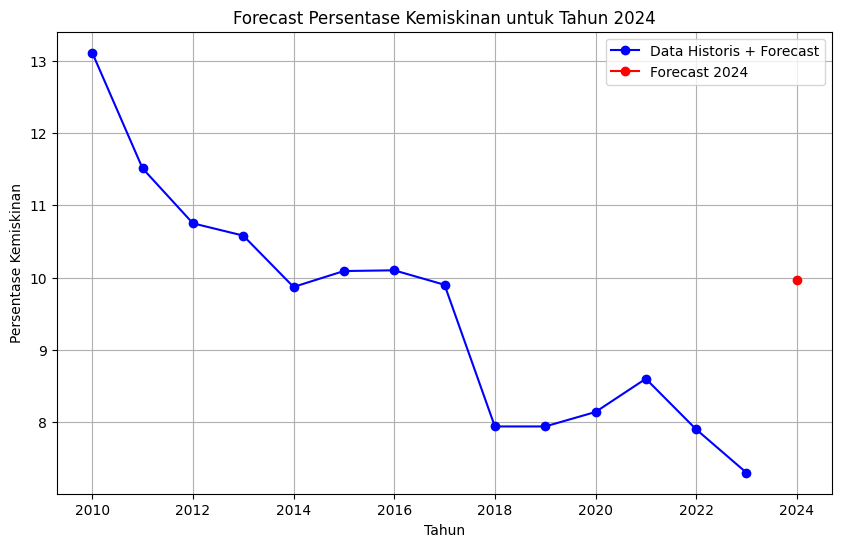

In [112]:
# Menggabungkan data asli dan data forecasting untuk plot
historical_data = data[['Tahun', 'Persentase Kemiskinan']]
forecast_2024_data = forecast_2024[['Tahun', 'Persentase Kemiskinan']]

# Gabungkan data historis dan hasil forecast
combined_data = pd.concat([historical_data, forecast_2024_data])

# Plot data historis dan hasil forecast sebagai satu garis yang tersambung
plt.figure(figsize=(10, 6))
plt.plot(historical_data['Tahun'], historical_data['Persentase Kemiskinan'], marker='o', color='blue', label='Data Historis + Forecast')
plt.plot(forecast_2024_data['Tahun'], forecast_2024_data['Persentase Kemiskinan'], marker='o', color='red', label='Forecast 2024')

# Menambahkan judul dan label
plt.title('Forecast Persentase Kemiskinan untuk Tahun 2024')
plt.xlabel('Tahun')
plt.ylabel('Persentase Kemiskinan')
plt.legend()
plt.grid(True)
plt.show()

### Hasil Setiap Model

In [116]:
# Dictionary untuk menyimpan hasil forecast dari setiap model
forecast_results = {}

# Langkah 1: Standarisasi data eksogen 2024
forecast_2024_scaled = scaler.transform(forecast_2024[exog_vars])

# Langkah 2: Transformasi data eksogen 2024 menggunakan PCA
forecast_2024_pca = pca.transform(forecast_2024_scaled)[:, pcs_above_one]

# Langkah 3: Melakukan forecast untuk tahun 2024 menggunakan setiap model yang sudah di-tuning
for name, model in best_models.items():
    forecast_2024[target] = model.predict(forecast_2024_pca)
    forecast_results[name] = forecast_2024[target].values[0]  # Simpan hasil prediksi untuk tahun 2024

# Tampilkan hasil forecasting dari setiap model
for model_name, forecast_value in forecast_results.items():
    print(f"Forecast 'Persentase Kemiskinan' tahun 2024 oleh {model_name}: {forecast_value:.4f}")


Forecast 'Persentase Kemiskinan' tahun 2024 oleh Random Forest: 10.1140
Forecast 'Persentase Kemiskinan' tahun 2024 oleh Gradient Boosting: 9.9709
Forecast 'Persentase Kemiskinan' tahun 2024 oleh XGBoost: 9.9652


### Menyimpan Model

In [120]:
import joblib

# Simpan model terbaik dari setiap metode
for name, model in best_models.items():
    filename = f'{name}_model.pkl'
    joblib.dump(model, filename)
    print(f'Model {name} berhasil disimpan sebagai {filename}')


Model Random Forest berhasil disimpan sebagai Random Forest_model.pkl
Model Gradient Boosting berhasil disimpan sebagai Gradient Boosting_model.pkl
Model XGBoost berhasil disimpan sebagai XGBoost_model.pkl


#### Input Query

In [124]:
# Load the necessary files (scaler, PCA, and trained models)
scaler = joblib.load('scaler.pkl')
pca = joblib.load('pca.pkl')
best_models = {
    'Random Forest': joblib.load('Random Forest_model.pkl'),
    'Gradient Boosting': joblib.load('Gradient Boosting_model.pkl'),
    'XGBoost': joblib.load('XGBoost_model.pkl'),
}

In [125]:

# Function to perform forecasting based on new input data
def forecast_poverty_percentage(new_input, exog_vars, target):
    # Step 1: Standardize the new exogenous input data
    new_input_scaled = scaler.transform([new_input])

    # Step 2: Transform the standardized data using PCA
    new_input_pca = pca.transform(new_input_scaled)[:, pcs_above_one]

    # Step 3: Perform forecasting for the new input data using each of the tuned models
    forecast_results = {}
    for name, model in best_models.items():
        forecast_value = model.predict(new_input_pca)
        forecast_results[name] = forecast_value[0]  # Store the forecasted value

    return forecast_results

In [136]:

# Example input data for 2025 (as an array or list)
import random

new_input_2025 = [random.randint(1, 100) for _ in range(8)]

# Replace with the actual values for exogenous variables

exog_vars = [
    'Biaya kuliah',
    'Biaya listrik',
    'Biaya rumah sakit',
    'Medical check up',
    'Paket Internet',
    'Biaya sekolah',
    'Harga bensin',
    'Jual rumah'
]

# Target variable to be predicted
target = 'Persentase Kemiskinan'

# Perform forecasting for the new input data
forecast_2025 = forecast_poverty_percentage(new_input_2025, exog_vars, target)

# Display the forecast results
for model_name, forecast_value in forecast_2025.items():
    print(f"Forecast 'Persentase Kemiskinan' for 2025 by {model_name}: {forecast_value:.4f}")

Forecast 'Persentase Kemiskinan' for 2025 by Random Forest: 8.2429
Forecast 'Persentase Kemiskinan' for 2025 by Gradient Boosting: 8.6492
Forecast 'Persentase Kemiskinan' for 2025 by XGBoost: 8.9183


c:\Users\fezaa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
